In [1]:
import warnings
warnings.filterwarnings('ignore')

# Library for EDA & Visualisasi
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib.ticker as mtick
style.use('fivethirtyeight')

# Library Preprocessing
from scipy.stats import chi2_contingency
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn import over_sampling

# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, precision_recall_curve, auc, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
#Read File
df = pd.read_csv('Train.csv')

df.columns = ['ID',
 'Warehouse_block',
 'Mode_of_Shipment',
 'Customer_care_calls',
 'Customer_rating',
 'Cost_of_the_Product',
 'Prior_purchases',
 'Product_importance',
 'Gender',
 'Discount_offered',
 'Weight_in_gms',
 'arrived_late']

coba = df.sample(500)

In [3]:
coba.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,arrived_late
4361,4362,F,Road,5,1,172,5,medium,F,1,4730,0
1287,1288,B,Ship,4,1,191,3,low,M,4,2724,1
4982,4983,A,Ship,3,3,262,7,high,F,9,5097,0
3501,3502,B,Ship,4,2,247,3,medium,M,8,4977,0
574,575,C,Ship,4,2,276,2,low,M,54,3706,1


In [4]:
coba2 = coba.drop('ID', axis = 1)

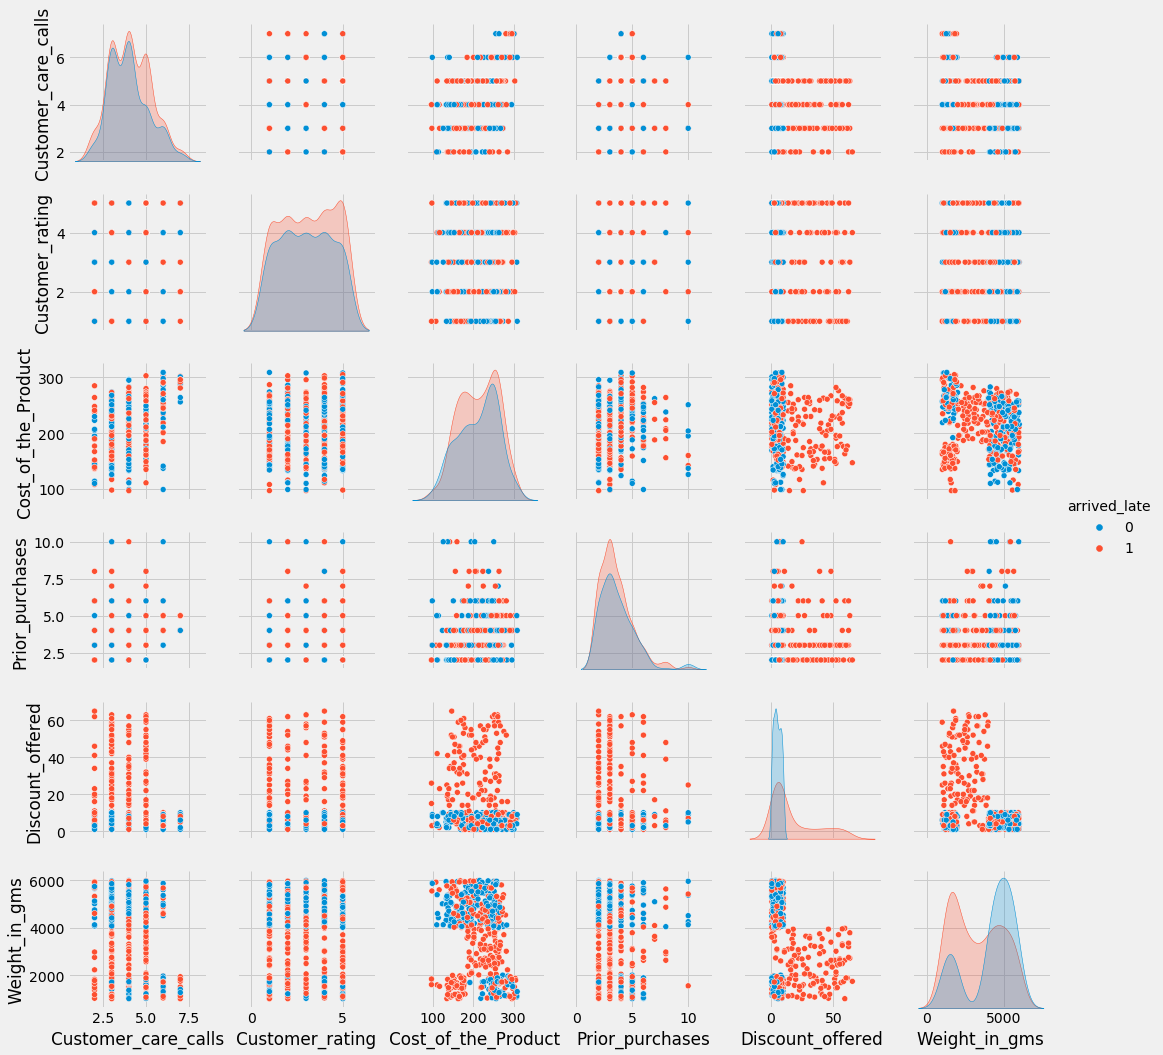

In [5]:
sns.pairplot(data = coba2, hue = 'arrived_late')

In [6]:
filter1 = df['Customer_rating'] == 2
filter2 = df['Discount_offered'] <= 10

coba3 = df[filter1 & filter2]

In [7]:
coba3.arrived_late.value_counts(normalize = True)

0    0.550278
1    0.449722
Name: arrived_late, dtype: float64